# Section by Bradley - Correlations, Distributions & Group Comparisons 

In [49]:
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np 
from pathlib import Path

load data

In [50]:
data_path = Path('../data/final/final_dataset.csv')
education = pd.read_csv(data_path)

print("Dataset Loaded Successfully")
print("Shape:", education.shape)
education.head()


Dataset Loaded Successfully
Shape: (12424, 18)


,ActiveLearner,Age,AssignmentCompletion,Attendance,Discussions,EduTech,ExamScore,Extracurricular,FinalGrade,Gender,Internet,LearningStyle,Motivation,OnlineCourses,PassStatus,Resources,StressLevel,StudyHours
0,No,19.0,59.0,64.0,1,0,40.0,No,D,Female,Yes,Kinesthetic,Low,8.0,Fail,Medium,1.0,19.0
1,No,23.0,90.0,64.0,0,0,66.0,No,C,Female,Yes,Reading/Writing,Low,16.0,Pass,Medium,1.0,19.0
2,No,28.0,67.0,64.0,0,1,99.0,No,A,Female,Yes,Auditory,Low,19.0,Pass,Medium,1.0,19.0
3,Yes,19.0,59.0,64.0,1,0,40.0,Yes,D,Female,Yes,Kinesthetic,Low,8.0,Fail,Medium,1.0,19.0
4,Yes,23.0,90.0,64.0,0,0,66.0,Yes,C,Female,Yes,Reading/Writing,Low,16.0,Pass,Medium,1.0,19.0


## Correlation of numeric columns

In [51]:
#correlation matrix using only numeric columns

numeric_education = education.select_dtypes(include=[np.number])
corr = numeric_education.corr()
print(corr)

                           Age  AssignmentCompletion  Attendance  Discussions  \
Age                   1.000000             -0.011570   -0.044502    -0.023321   
AssignmentCompletion -0.011570              1.000000   -0.001346     0.001282   
Attendance           -0.044502             -0.001346    1.000000    -0.007058   
Discussions          -0.023321              0.001282   -0.007058     1.000000   
EduTech               0.011464              0.005037    0.004402     0.000526   
ExamScore            -0.008413              0.027585   -0.013149    -0.031705   
OnlineCourses         0.003561              0.011016    0.006693     0.001936   
StressLevel          -0.011078              0.013315   -0.013496    -0.024710   
StudyHours           -0.000306              0.008174    0.022503     0.025784   

                       EduTech  ExamScore  OnlineCourses  StressLevel  \
Age                   0.011464  -0.008413       0.003561    -0.011078   
AssignmentCompletion  0.005037   0.027585  

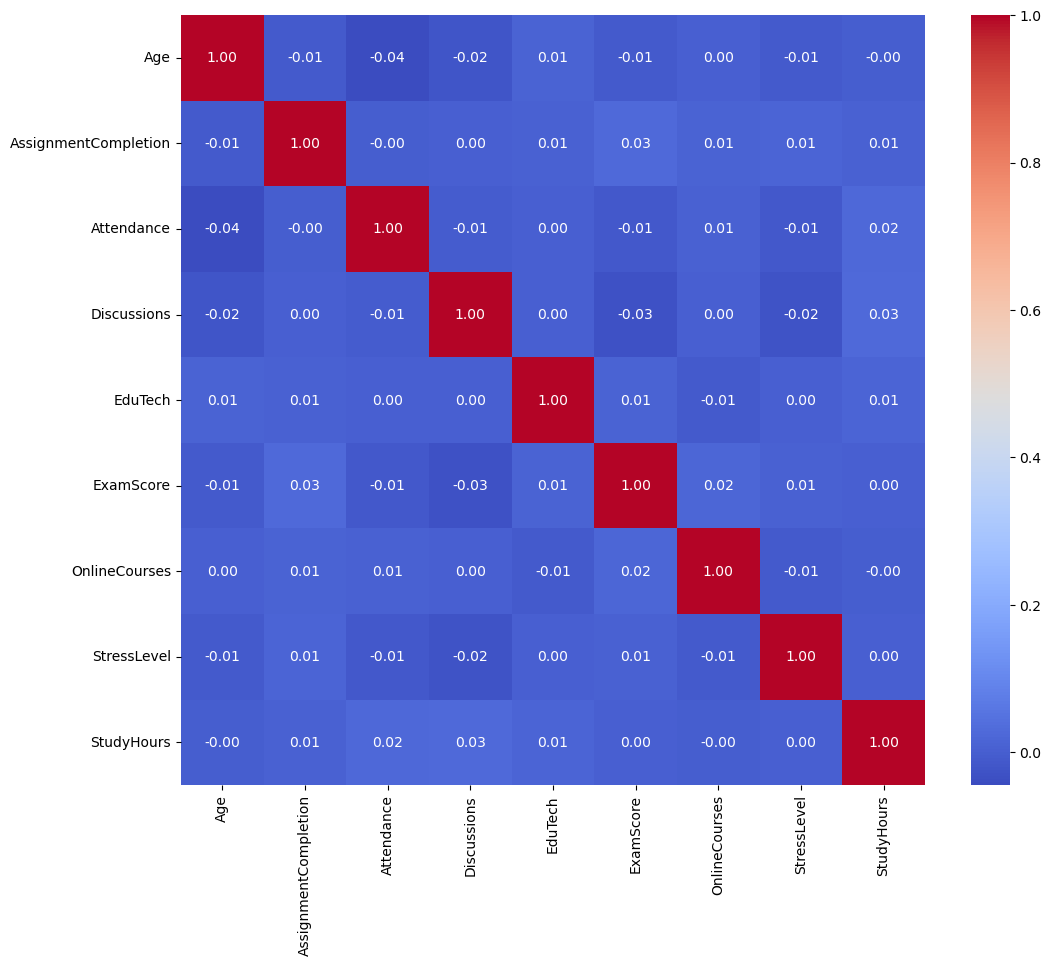

In [52]:
#plot heatmap
plt.figure(figsize=(12,10))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='coolwarm')
plt.show()

In [53]:
# show highest correlations
corr_unstacked = corr.unstack()
sorted_corr = corr_unstacked.sort_values(kind="quicksort", ascending=False)
print("Highest correlations:\n", sorted_corr[sorted_corr < 1].head(10))

Highest correlations:
 AssignmentCompletion  ExamScore               0.027585
ExamScore             AssignmentCompletion    0.027585
StudyHours            Discussions             0.025784
Discussions           StudyHours              0.025784
Attendance            StudyHours              0.022503
StudyHours            Attendance              0.022503
OnlineCourses         ExamScore               0.020605
ExamScore             OnlineCourses           0.020605
StudyHours            EduTech                 0.014595
EduTech               StudyHours              0.014595
dtype: float64


This plot shows the correlation of the numerical columns ; ['Age', 'AssignmentCompletion', 'Attendance', 'ExamScore', 'OnlineCourses', 'StudyHours']

## Distributions 

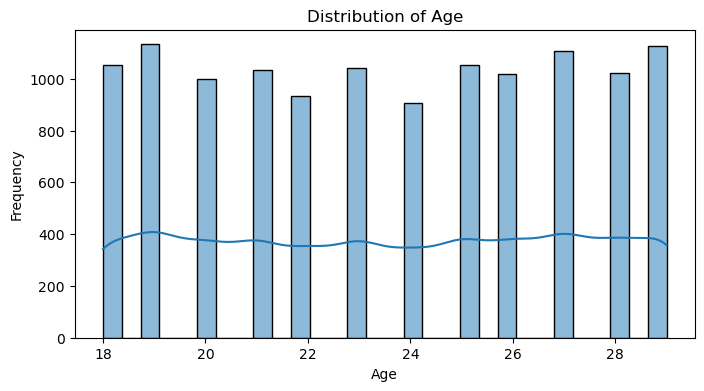

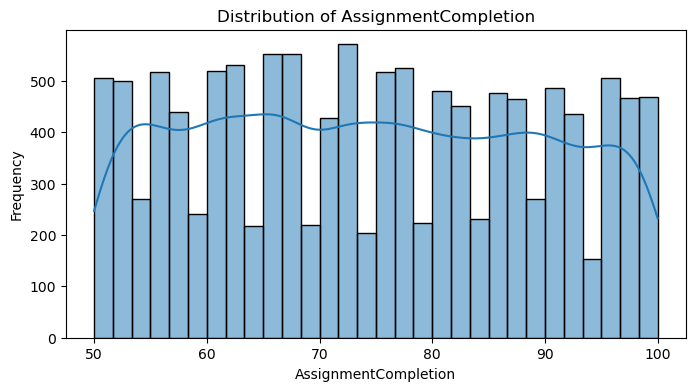

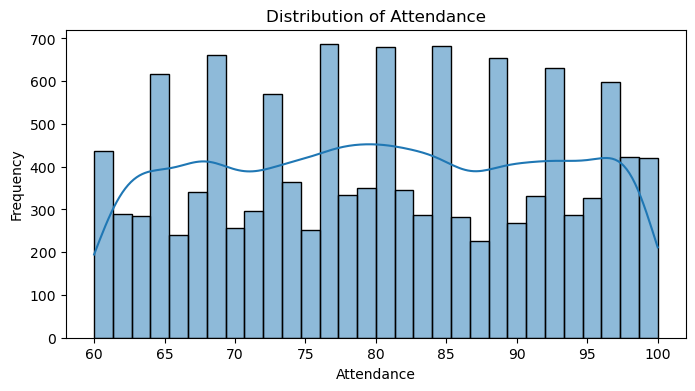

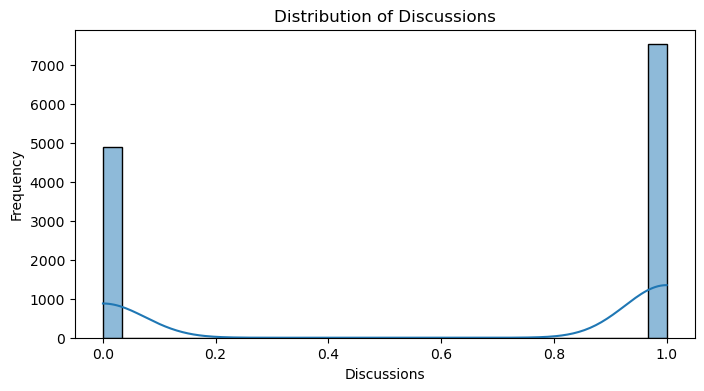

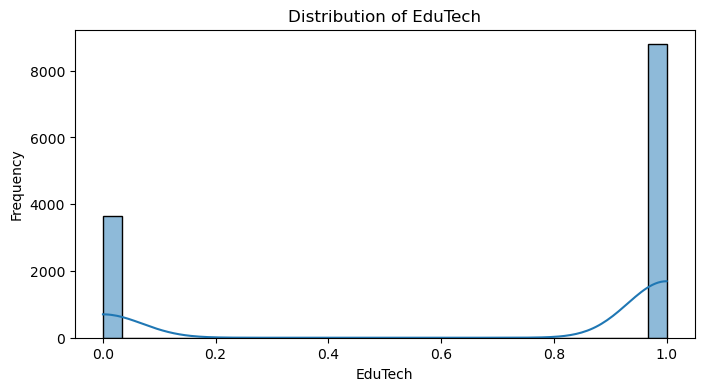

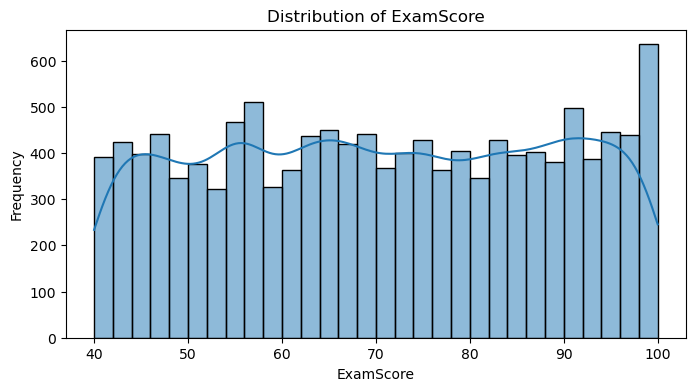

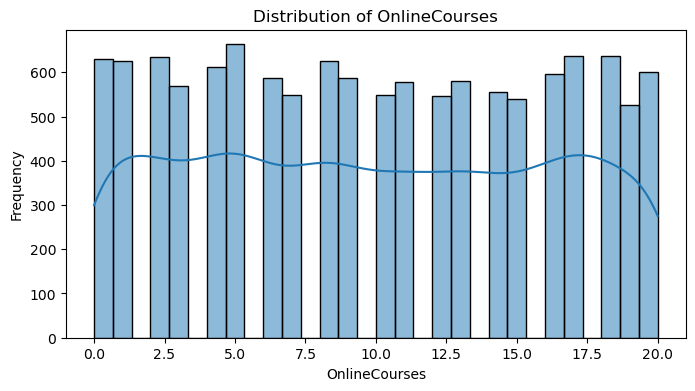

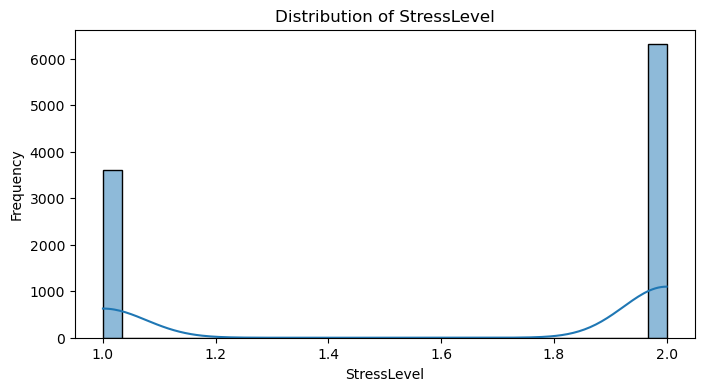

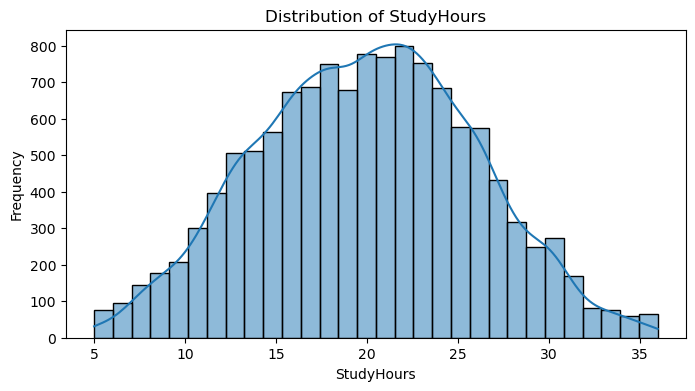

In [54]:
# drstirubutions
numeric_cols = numeric_education.columns
for col in numeric_cols:
    plt.figure(figsize=(8, 4))
    sns.histplot(numeric_education[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.show()
    

## Group Comparisons

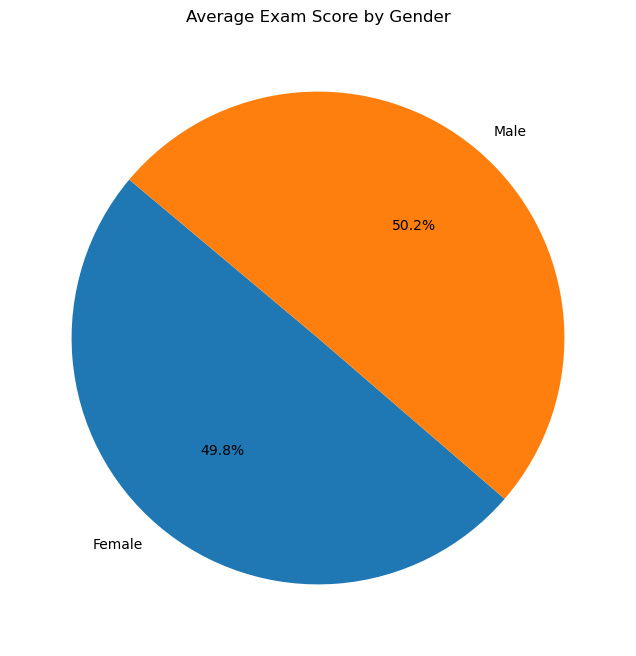

In [55]:
#group comparisons
grouped_by_gender = education.groupby('Gender')['ExamScore'].mean().reset_index()
#pie chart
plt.figure(figsize=(8, 8))
plt.pie(grouped_by_gender['ExamScore'], labels=grouped_by_gender['Gender'], autopct='%1.1f%%', startangle=140)
plt.title('Average Exam Score by Gender')
plt.show()

In [56]:
#make age groups
group_by_age_group = education.copy()
bins = [16, 19, 22, 25, 30, np.inf]
labels = ['17-19', '20-22', '23-25', '26-30', '31+']
group_by_age_group['AgeGroup'] = pd.cut(group_by_age_group['Age'], bins=bins, labels=labels)

# mean exam score by age group
grouped_by_age_group = group_by_age_group.groupby('AgeGroup')['ExamScore'].mean().reset_index()

print(grouped_by_age_group.sort_values(by='AgeGroup'))

  AgeGroup  ExamScore
0    17-19  70.562929
1    20-22  70.094772
2    23-25  70.533845
3    26-30  70.168421
4      31+        NaN


C:\Users\Bradl\AppData\Local\Temp\ipykernel_28824\3075337269.py:8: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_by_age_group = group_by_age_group.groupby('AgeGroup')['ExamScore'].mean().reset_index()


posx and posy should be finite values
posx and posy should be finite values


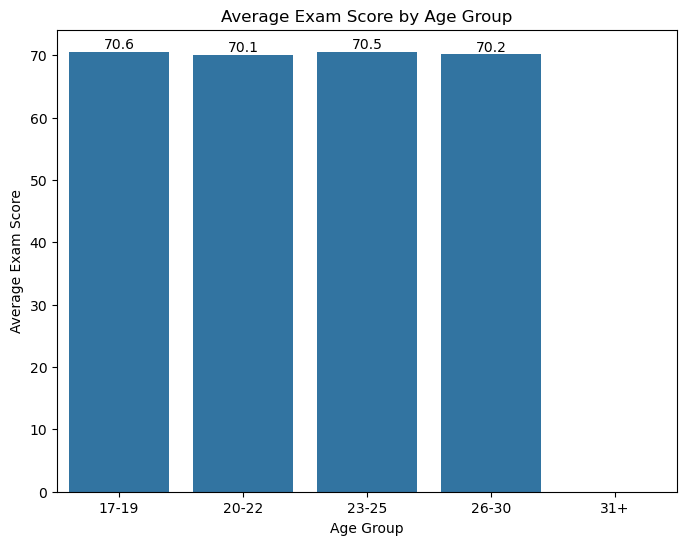

In [57]:
#plot average exam score by age group

plt.figure(figsize=(8, 6))
sns.barplot(x='AgeGroup', y='ExamScore', data=grouped_by_age_group, order=labels)

# add data points for age groups on the bars
for i, score in enumerate(grouped_by_age_group['ExamScore']):
    plt.text(i, score + 0.5, f'{score:.1f}', ha='center')

plt.title('Average Exam Score by Age Group')
plt.xlabel('Age Group')
plt.ylabel('Average Exam Score')
plt.show()

Exams Score by Stress level

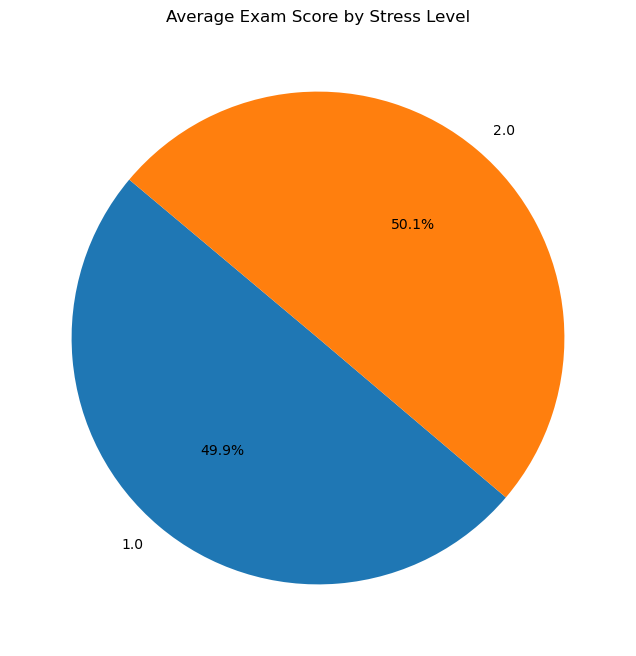

In [58]:
## group comparisons by Stress Level
group_by_stress = education.groupby('StressLevel')['ExamScore'].mean().reset_index()
#pie chart
plt.figure(figsize=(8, 8))
plt.pie(group_by_stress['ExamScore'], labels=group_by_stress['StressLevel'], autopct='%1.1f%%', startangle=140)
plt.title('Average Exam Score by Stress Level')
plt.show()

C:\Users\Bradl\AppData\Local\Temp\ipykernel_28824\2536215934.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='EduTech', y='ExamScore', data=education, inner='quartile', palette='Set2')


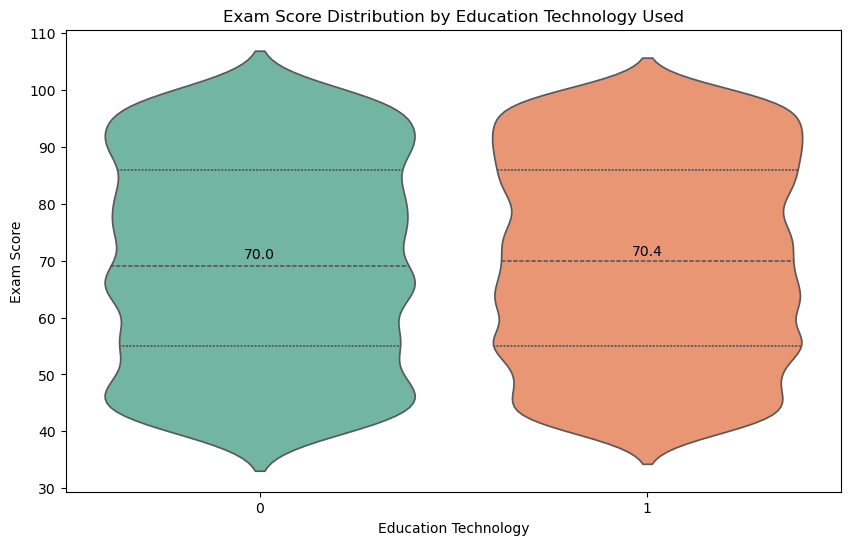

In [59]:
# group by Education tech by examscore
group_by_edutech = education.groupby('EduTech')['ExamScore'].mean().reset_index()

# make violin plot

plt.figure(figsize=(10, 6))
sns.violinplot(x='EduTech', y='ExamScore', data=education, inner='quartile', palette='Set2')


#add data values
for i, tech in enumerate(group_by_edutech['EduTech']):
    score = group_by_edutech[group_by_edutech['EduTech'] == tech]['ExamScore'].values[0]
    plt.text(i, score + 0.5, f'{score:.1f}', ha='center')


plt.title('Exam Score Distribution by Education Technology Used')
plt.xlabel('Education Technology')
plt.ylabel('Exam Score')
plt.show()

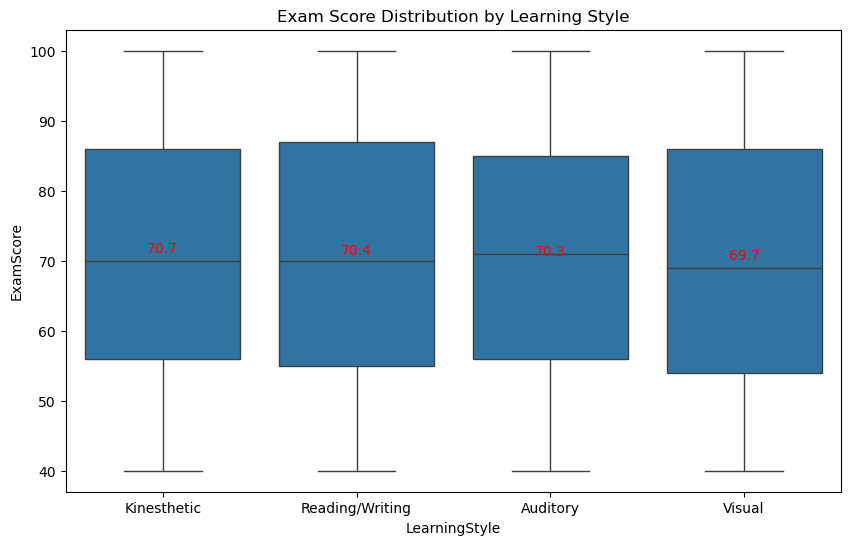

In [60]:
##learning styles comparisons
group_by_learning_style = education.groupby('LearningStyle')['ExamScore'].mean().reset_index()

# box plot for learning styles
plt.figure(figsize=(10, 6))
sns.boxplot(x='LearningStyle', y='ExamScore', data=education)
#add data points for learning styles on the boxplot
for i, style in enumerate(group_by_learning_style['LearningStyle']):
    mean_score = group_by_learning_style[group_by_learning_style['LearningStyle'] == style]['ExamScore'].values[0]
    plt.text(i, mean_score + 0.5, f'{mean_score:.1f}', ha='center', color='red')
plt.title('Exam Score Distribution by Learning Style')
plt.show()